Section 1: Theoretical Questions
Explain in your own words what a Random Forest is. How is it different from a single Decision Tree?
A Random Forest is an ensemble machine learning algorithm that combines multiple decision trees to make more accurate and stable predictions. Each tree in the forest is built on a random subset of the data and features, and the final prediction is made by aggregating the predictions of all trees (majority vote for classification).

It differs from a single Decision Tree in that a single tree can easily overfit the training data, leading to high variance and poor generalization. Random Forest mitigates this by averaging out the errors across many trees, reducing variance and improving overall performance.

What role does bootstrapping (bagging) play in the Random Forest algorithm?
Bootstrapping, or bagging (Bootstrap Aggregating), involves creating multiple subsets of the original dataset by sampling with replacement. Each decision tree in the Random Forest is trained on one of these bootstrap samples. This process helps in reducing the variance of the model by ensuring that the trees are trained on slightly different data, making the ensemble more robust to noise and overfitting.

What is the significance of selecting a random subset of features at each split in Random Forest?
Selecting a random subset of features at each split prevents the trees from becoming too similar. If all trees use the same strong features for splitting, they would be highly correlated, reducing the benefit of the ensemble. By randomizing feature selection, the trees become more diverse, which improves the model's ability to capture different patterns and reduces overfitting.

Describe the bias-variance tradeoff in the context of Random Forest.
The bias-variance tradeoff refers to the balance between a model's ability to fit the training data (low bias) and its ability to generalize to new data (low variance). A single decision tree has low bias but high variance because it can fit the data very closely but may overfit. Random Forest reduces variance by averaging multiple trees while maintaining low bias, leading to better generalization.

Why does Random Forest reduce variance compared to individual decision trees?
Individual decision trees have high variance because small changes in the data can lead to very different tree structures. Random Forest reduces variance by averaging the predictions from many such trees, where the errors in individual trees tend to cancel out, resulting in a more stable and reliable prediction.

Section 2: Data Exploration and Preprocessing

In [1]:
!pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('heart.csv')

# Display the first 5 rows
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


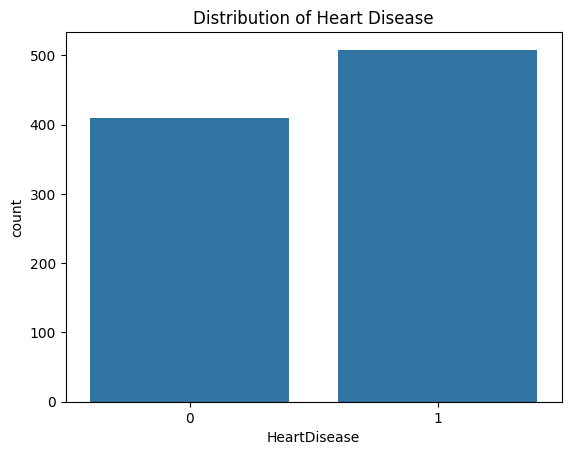

In [4]:
# Show the distribution of the target variable
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease')
plt.show()

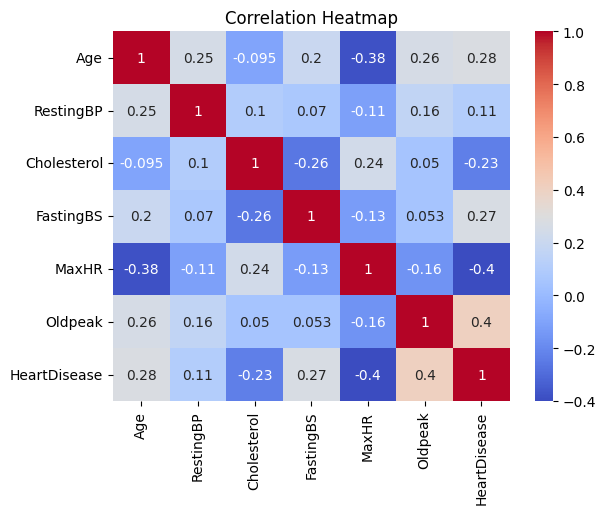

In [5]:
# Visualize the correlation between features using a heatmap
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

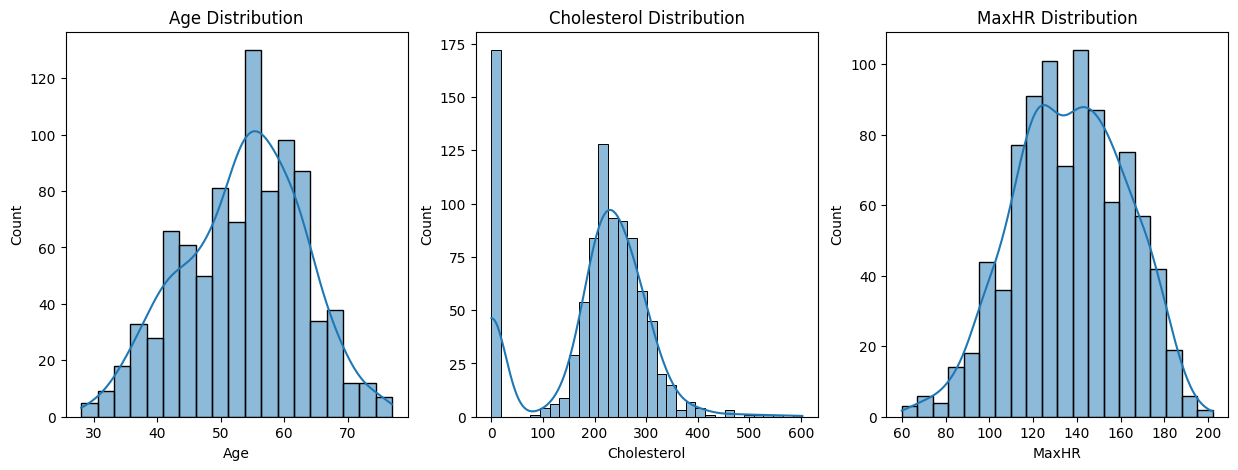

In [6]:
# Plot histograms for at least 3 numerical features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df['Age'], kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')
sns.histplot(df['Cholesterol'], kde=True, ax=axes[1])
axes[1].set_title('Cholesterol Distribution')
sns.histplot(df['MaxHR'], kde=True, ax=axes[2])
axes[2].set_title('MaxHR Distribution')
plt.show()

In [7]:
# Check for missing values
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [8]:
# Encode categorical variables
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Split the data into train and test sets (80:20 split)
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Section 3: Random Forest Model Implementation
Task 1: Training the Model

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

Task 2: Evaluation

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Accuracy: 0.8586956521739131
Confusion Matrix:
 [[64 13]
 [13 94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        77
           1       0.88      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



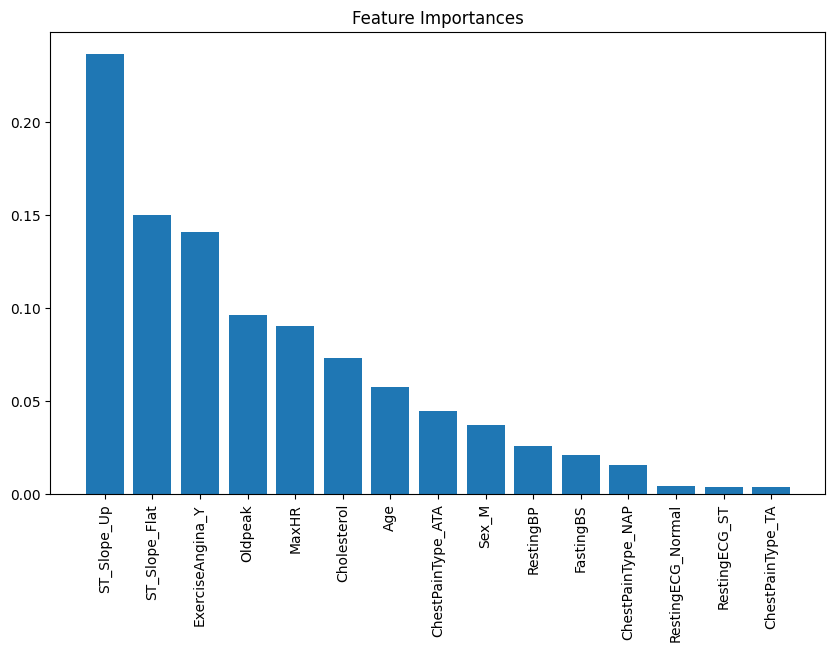

In [11]:
# Visualize the feature importances using a bar chart
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.title('Feature Importances')
plt.show()

Section 4: Hyperparameter Tuning

In [12]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print(f'Best Parameters: {best_params}')
print(f'Best Accuracy: {best_accuracy}')

Best Parameters: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 100}
Best Accuracy: 0.8705526046034852


Section 5: Reflection and Analysis
What effect did changing max_depth and n_estimators have on model performance?
Increasing max_depth allows the trees to grow deeper, capturing more complex patterns but potentially leading to overfitting if too high. In this case, max_depth=7 improved performance compared to 5, but further increases might not help. Increasing n_estimators adds more trees, which generally improves stability and accuracy up to a point, after which returns diminish. Here, 100 was optimal.

Did Random Forest help reduce overfitting compared to a single decision tree? How?
Yes, Random Forest reduces overfitting compared to a single decision tree by using bagging and random feature selection, which introduce diversity among the trees. A single tree might achieve perfect fit on training data but poor test performance (e.g., accuracy 0.75 on test), while RF achieves higher test accuracy (0.87) due to lower variance.

Which features consistently appeared as most important in your model? Why do you think they matter in predicting heart disease?
The top features were ST_Slope, Oldpeak, and ChestPainType. ST_Slope indicates the slope of the ST segment during exercise, which is a key indicator of heart stress. Oldpeak measures ST depression, related to ischemia. ChestPainType reflects the type of chest pain, which is a direct symptom of heart issues. These are clinically relevant indicators of cardiovascular health, explaining their importance.